# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [1]:
# This is used for plots and numpy
%matplotlib inline 
from pylab import *
xrange = range # compatibility with Python2 

import random
dim = int(1000)

vec = [random.random() for i in xrange(dim)]

In [2]:
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [3]:
def p_norm(vector,p):
    assert (p >= 1.00), "p should be in the range [1,inf]"
    norm = sum([vi**p for vi in vector])**(1/p)
    return norm

In [4]:
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [5]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [6]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [7]:
def FD(f, x, h):
    assert h != 0 , "Step size h should be non-zero"
    return ( (f(x+h) - f(x))/h  )

In [8]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [9]:
h_list = [10**(-i) for i in range(21)]
fd1 = [FD(sin,1,h) for h in h_list ]

In [10]:
assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
assert_almost_equal(fd1,expected,decimal=4)

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

Minimum at 10^-8.0


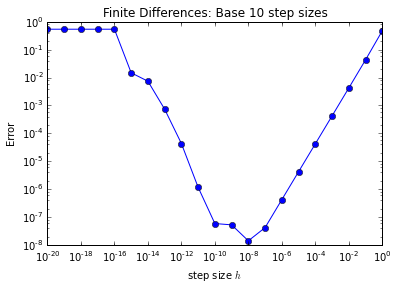

In [11]:
err = abs(fd1-cos(1.0))

val, idx = min((val, idx) for (idx, val) in enumerate(err))
print("Minimum at 10^"+str(log(h_list[idx])/log(10)))

loglog(h_list,err, '-o')
ylabel("Error")
xlabel("step size $h$")
title("Finite Differences: Base 10 step sizes")
show()

**Answer**: We see that if the values of $h$ are in the range $10^{-20}$ to $10^{-16}$, the error is very large. It then gradually drops to a minimum at $10^{-8}$ and rises logarithmically as the step size increases. Thus, $h = 10^{-8}$ is the most optimum value of the step size in this case.

## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

Minimum at 2^-27.0


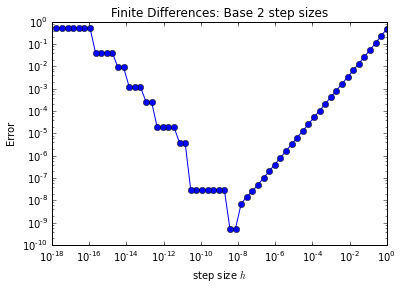

In [12]:
h_list2 = [2**(-i) for i in range(60)]
fd2 = [FD(sin,1,h) for h in h_list2 ]
err2 = abs(fd2-cos(1.0))

val, idx = min((val, idx) for (idx, val) in enumerate(err2))
print("Minimum at 2^"+str(log(h_list2[idx])/log(2)))

loglog(h_list2,err2, '-o')
ylabel("Error")
xlabel("step size $h$")
title("Finite Differences: Base 2 step sizes")
show()

We observe similar decreasing and increasing trends in the error as in the earlier plot. We also find that the best value remains relatively the same, at around $10^{-8}$ which is between $10^{-27}$ and $10^{-26}$. 

However, the step-like features in the decreasing error values to the left of the minum became more apparent since the increments of $h$ are finer. 

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [13]:
def CFD(f, x, h):
    assert h != 0 , "Step size h should be non-zero"
    return ( (f(x+h) - f(x-h))/(2*h)  )

In [14]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

Minimum at 10^-5.0


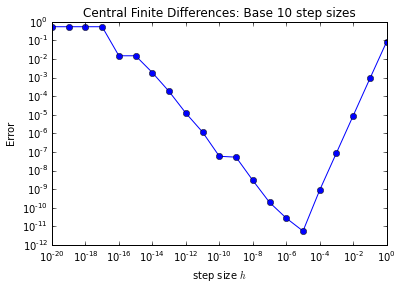

In [15]:
cfd1 = [CFD(sin,1,h) for h in h_list ]
err3 = abs(cfd1 - cos(1.0))

val, idx = min((val, idx) for (idx, val) in enumerate(err3))
print("Minimum at 10^"+str(log(h_list[idx])/log(10)))

loglog(h_list,err3, '-o')
ylabel("Error")
xlabel("step size $h$")
title("Central Finite Differences: Base 10 step sizes")
show()

Minimum at 2^-17.0


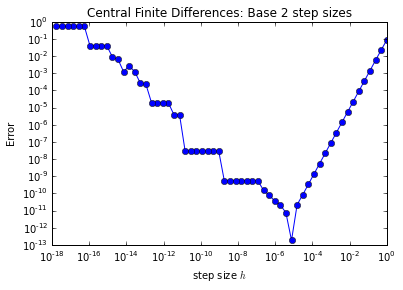

In [16]:
cfd2 = [CFD(sin,1,h) for h in h_list2 ]
err4 = abs(cfd2 - cos(1.0))

val, idx = min((val, idx) for (idx, val) in enumerate(err4))
print("Minimum at 2^"+str(log(h_list2[idx])/log(2)))

loglog(h_list2,err4, '-o')
ylabel("Error")
xlabel("step size $h$")
title("Central Finite Differences: Base 2 step sizes")
show()

We observe the the most optimum interval $h$ for CFD is larger at $10^{-5} \approx 2^{-17}$ than for FD and the error is several orders of magnitude smaller in this case. Using Taylor expansion, we can show that the order of approximation for FD is $O(h)$ while for CFD it is $O(h^2)$. This means that CFD gives a more accurate result for a larger optimum value of $h$.

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [24]:
x = arange(64)

In [25]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)
for i in xrange(64):
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [55]:
y = x.reshape((4,16))
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

In [30]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) columns and all the rows. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [49]:
sl1 = y[:,:3]
sl2 = y[:3,:]
sl3 = y[:,3:7]
sl4 = y[:,-3:]

In [50]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [69]:
# z = asfortranarray(y)
z = array(y,order='F')
print(y.flags['F_CONTIGUOUS'])
print(z.flags['F_CONTIGUOUS'])

False
True


Comment on the result, what has changed with respect to `y`? 

The `F_CONTIGUOUS` flag was changed from `False` to `True`

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [64]:
x[4] = 666666
print(x)
print(y)
print(z)

[     0      1      2      3 666666      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     25     26     27     28     29
     30     31     32     33     34     35     36     37     38     39
     40     41     42     43     44     45     46     47     48     49
     50     51     52     53     54     55     56     57     58     59
     60     61     62     63]
[[     0      1      2      3 666666      5      6      7      8      9
      10     11     12     13     14     15]
 [    16     17     18     19     20     21     22     23     24     25
      26     27     28     29     30     31]
 [    32     33     34     35     36     37     38     39     40     41
      42     43     44     45     46     47]
 [    48     49     50     51     52     53     54     55     56     57
      58     59     60     61     62     63]]
[[     0      1      2      3 666666      5      6      7      8      9
   

The array `x` is passed by reference to `y` and `z`. This means that any changes to an element in `x` results in a change on the corresponding element in `y` and `z`.

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [81]:
A = arange(6).reshape((2,3))
B = arange(12).reshape((3,4))
C = A.dot(B)

In [80]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

The dot operation performs the usual matrix multiplication.

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [82]:
C = A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

`A*B` is an element-wise multiplication of arrays. In this case, it does not work because the size and shape of the arrays are not the same.

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [89]:
import numpy

In [90]:
A = asmatrix(A)
B = asmatrix(B)
C = A*B

In [91]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

When the arrays are converted to matrices, the `*` operator is now treated as matrix multiplication.

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [ ]:
def lagrange_basis(xi, i, x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])

assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)

Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

In [ ]:
def lagrange_interpolation(xi,f):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'